# Have a look at tracks

In [1]:
import scclevr
import numpy as np
import matplotlib.pyplot as plt

In [34]:
tracks = scclevr.TracksBinaryUniform(3)

In [35]:
event_images, object_images, n_objects, object_features =  tracks.gen_events(10)

In [36]:
object_images.shape

(10, 3, 32, 32)

In [67]:
import math

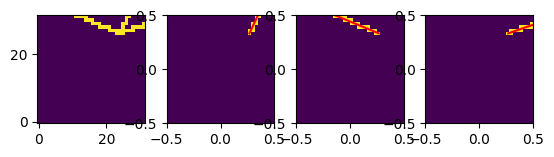

In [79]:
i = 5
fig = plt.figure()
plt.subplot(1, 4, 1)
plt.imshow(event_images[i, 0], origin = 'lower')
for j in range(3):
    plt.subplot(1, 4, j+2)
    plt.imshow(object_images[i, j], origin = 'lower', extent=[-0.5, 0.5, -0.5, 0.5])
    #plt.plot(object_features[i].T[0], object_features[i].T[1], marker='o', c='red', fillstyle='none')
    x1 = object_features[i, j, 0]
    y1 = object_features[i, j, 1]
    phi = object_features[i, j, 2]
    y2 = y1 + math.sin(math.radians(phi))
    x2 = x1 + math.cos(math.radians(phi))
    plt.plot([x1, x2], [y1, y2], color='red')
    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)

In [38]:
object_features[0].T[0] # x, y immer gleich, drittes feature ist phi (Winkel)

array([0.11400398, 0.11400398, 0.11400398], dtype=float32)

In [42]:
object_features.shape

(10, 3, 3)

In [43]:
object_features[0].T[2] # phi in [0, 360]

array([ 69.38055, 161.30159, 357.97943], dtype=float32)

In [60]:
xend

0.35408529982818177

In [61]:
yend

0.5

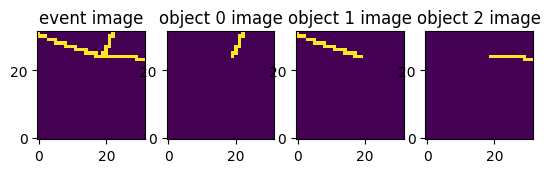

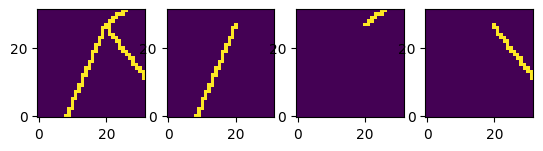

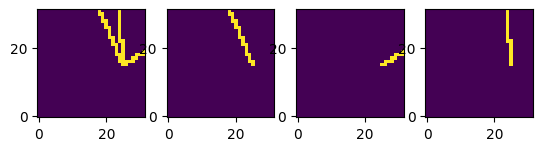

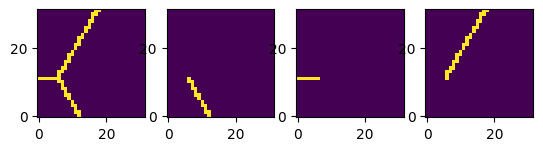

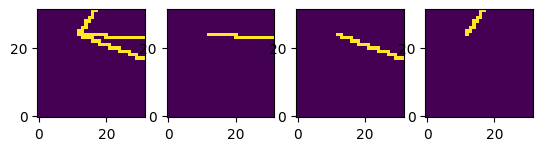

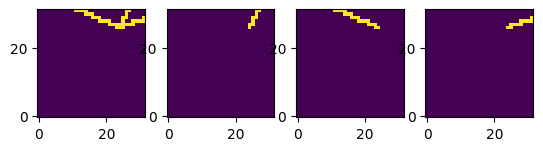

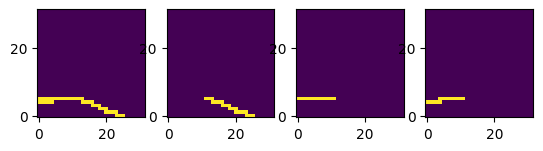

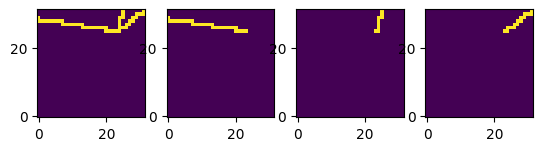

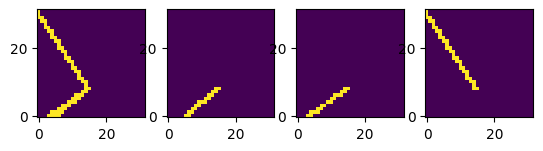

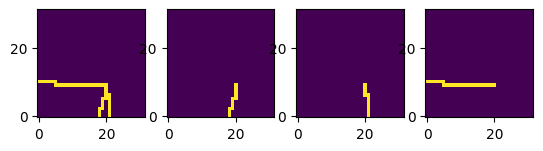

In [39]:
plot_n_events = min(event_images.shape[0], 10)
for i in range(plot_n_events):
    fig, axes = plt.subplots(1, n_objects[i]+1, )
    axes[0].imshow(event_images[i, 0], origin = 'lower')
    if i == 0:
        axes[0].set_title('event image')
    for j in range(n_objects[i]):
        if i == 0:
            axes[j+1].set_title(f'object {j} image')
        axes[j+1].imshow(object_images[i][j], origin = 'lower')

In [40]:
import os
os.sys.path.append('./../../../evaluation')
from dataset import TestDataset

In [41]:
ds = TestDataset(obj_type='track')